In [2]:
import numpy as np
import importlib
import soa as SOA
import plotting as PLOTTING
importlib.reload(SOA)
importlib.reload(PLOTTING)
import matplotlib.pyplot as plt

In [2]:
##Test af rotfromquat
q = np.array([0, 0, 0, 1])
R = SOA.rotfromquat(q)
print(np.shape(R))

#uncomment to trigger assert 
# q_fail = np.array([0, 0, 0, 1]).reshape((4,1))
# R_fail = SOA.rotfromquat(q_fail)

(3, 3)


In [52]:
## test af skewfromvec
v = np.array([1,2,3]) 
S = SOA.skewfromvec(v)
print(np.shape(S))

#uncomment to trigger assert 
# v_fail = v.reshape((3,1))
# S_fail = SOA.skewfromvec(v_fail)

(3, 3)


In [53]:
## Test af RBT
v = np.array([1,2,3])
phi = SOA.RBT(v)
print(np.shape(phi))

(6, 6)


Generating Force Plot...


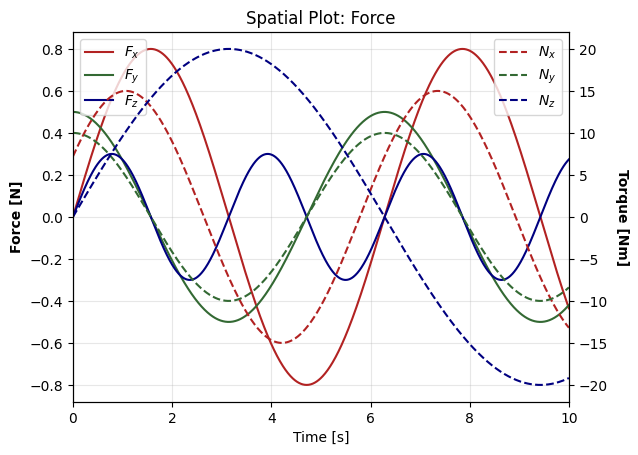

In [55]:
# 1. Create a time vector: 0 to 10 seconds, 1000 points
N = 1000
t_test = np.linspace(0, 10, N)

# 2. Generate dummy data (6 rows, N columns)
# Rows 0, 1, 2: "Linear" data (Small values, e.g., -1 to 1)
linear_data = np.array([
    0.8 * np.sin(t_test),      # x-component
    0.5 * np.cos(t_test),      # y-component
    0.3 * np.sin(2 * t_test)   # z-component
])

# Rows 3, 4, 5: "Angular" data (Large values, e.g., -20 to 20)
angular_data = np.array([
    15 * np.sin(t_test + 0.5), # x-component
    10 * np.cos(t_test),       # y-component
    20 * np.sin(0.5 * t_test)  # z-component
])

# Stack them to get a (6, N) array
spatial_data = np.vstack((linear_data, angular_data))
# 3. Run the test for each mode
print("Generating Force Plot...")
PLOTTING.spatial_plot(t_test, spatial_data, type="force")

In [ ]:
test = np.array()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1153731109.py, line 1)

In [4]:
from N_body_pendul import N_body_pendulum

n_bodies = 64

result = N_body_pendulum(n_bodies)


In [39]:
print(result)
#gemmer sim data
np.savez_compressed('pendulum_data.npz', time=result.t, states=result.y)
print("Simulation data saved successfully.")
#PLOTTING.N_body_pendulum_gen_plot(result.t,result.y,n_bodies)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.000e-02 ...  4.995e+01  4.998e+01]
        y: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            [ 0.000e+00  9.308e-18 ...  1.753e-01  3.816e-02]
            ...
            [ 0.000e+00  7.059e-01 ...  2.141e+00  1.167e+00]
            [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 54821
     njev: 0
      nlu: 0
Simulation data saved successfully.


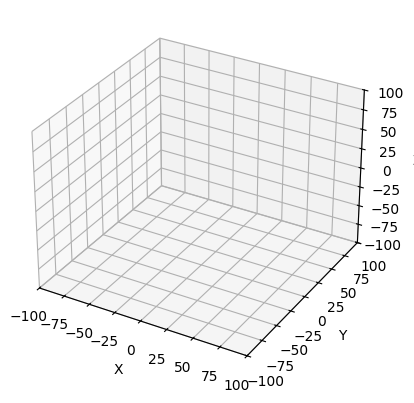

mean dt: 0.03
N frames: 1667


In [44]:
PLOTTING.animate_n_bodies(result.t, result.y, np.array([0,0,0.2]))
print("mean dt:", np.mean(np.diff(result.t)))
print("N frames:", result.t.size)

